In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

df0 = pd.read_csv("datathon/dataset/outfit_data.csv")
df1 = pd.read_csv("datathon/dataset/product_data.csv")


In [23]:
import os
import shutil

# Directorio que contiene las imágenes originales
directorio_origen = "datathon/images"


In [31]:
import os
from PIL import Image

directorio_imagenes = "datathon/images"

imagenes = [archivo for archivo in os.listdir(directorio_imagenes) if archivo.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

fotos = list()
for imagen in imagenes:
    fotos.append( os.path.join(directorio_imagenes, imagen)) 

# Abre la imagen
imagen = Image.open(fotos[0])

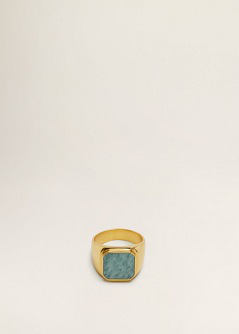

In [38]:
from PIL import Image

# Abre la imagen
imagen = Image.open(fotos[230])
imagen


In [40]:
df0['col'] = df0['cod_modelo_color'].apply(lambda x: x.split('-')[1])
df_grouped = df0.groupby('cod_outfit')['col'].apply(list).reset_index()

In [41]:
df_grouped

,cod_outfit,col
0,1,"[02, 01, 02, 08, 01, OR, OR]"
1,2,"[02, 06, 02, 08, OR]"
2,3,"[OR, OR, 70, 70, 99, OR, 46, OR]"
3,4,"[OR, OR, OR, 46, OR, 85, 01, 01, 08, 11]"
4,5,"[02, OR, OR, OR, 99, 37, 08, 99, OR, 05, OR]"
...,...,...
7837,7838,"[30, 99, 30, 92, 08, 08, 99]"
7838,7839,"[30, 99, 30, 08, 08, 99, 99]"
7839,7840,"[OR, 99, OR, 99, 99]"
7840,7841,"[OR, OR, 99, 99, 43]"


In [68]:
df1["cod_color_code"].unique()

array(['02', 'TO', '81', '15', '70', '94', '17', '37', '96', '05', '74',
       '08', '32', '99', '83', 'TM', '12', '01', '07', '65', '30', '52',
       '45', '56', 'TU', '09', '43', '85', '88', '91', 'CU', '98', 'TC',
       'PL', '92', '80', 'OR', '46', 'TN', '20', 'DI', '03', '50', '78',
       '13', '06', '68', '82', '69', '23', '28', '79', '76', '35', '40',
       '57', '34', '14', '33', '90', '44', '16', '62', '77', '04', '49',
       '95', '26', '10', '31', '53', '11', '51', 'TA', 'CO', '18', '59',
       '87', '61', 'CG', '36', '41', 'TL', 'TG', 'DO', 'BL', '21', '38',
       '73', '75', '93', '19', 'BB', '25', '84', 'TS', 'GM', '42', '47',
       '48', '55', '54', '86', 'DC', '66', '72', '89', '27', '58', '97'],
      dtype=object)

In [76]:
conteo = dict()
for i in df1["cod_color_code"].unique():
    conteo[i] = 0
    for j in df_grouped.iloc[:,1].values:
        for k in j:
            if k == i:
                for z in range(0,len(j)):
                    conteo[k+j[z]] = 0

for i in df1["cod_color_code"].unique():
    conteo[i] = 0
    for j in df_grouped.iloc[:,1].values:
        for k in j:
            if k == i:
                conteo[i] += 1
                for z in range(0,len(j)):
                    if k != j[z]:
                        conteo[k+j[z]] += 1
                    else:
                        conteo[k+j[z]] += .5

In [127]:
def probabilidad_col(colorcode1, colorcode2, diccionario):
    code = colorcode1 + colorcode2
    prob = diccionario[code]/diccionario[colorcode1]
    return prob

In [79]:
probabilidad("02", "04", conteo)

0.003878116343490305

In [77]:
conteo

{'02': 1805,
 '0202': 1425.5,
 '0201': 566,
 '0208': 393,
 '02OR': 2010,
 '0206': 57,
 '0299': 1698,
 '0237': 55,
 '0205': 506,
 '0246': 54,
 '0270': 61,
 '0207': 168,
 '02BL': 13,
 '0250': 60,
 '0230': 177,
 '0232': 87,
 '0279': 15,
 '02TN': 47,
 '0257': 9,
 '0216': 4,
 '0243': 57,
 '02CG': 32,
 '0292': 127,
 '0209': 73,
 '02CU': 209,
 '0240': 10,
 '0256': 62,
 '0233': 9,
 '02PL': 251,
 '0252': 96,
 '0203': 18,
 '0211': 22,
 '0212': 27,
 '0228': 46,
 '0215': 34,
 '0269': 17,
 '0220': 36,
 '0254': 1,
 '02TM': 105,
 '0277': 8,
 '0204': 7,
 '0281': 16,
 '0280': 66,
 '0276': 7,
 '0214': 3,
 '0223': 4,
 '0245': 5,
 '0249': 10,
 '0290': 25,
 '0251': 4,
 '0294': 22,
 '02DO': 5,
 '02TO': 50,
 '02TU': 10,
 '02TC': 49,
 '02TG': 5,
 '0274': 6,
 '0287': 9,
 '0286': 1,
 '0278': 21,
 '0248': 1,
 '0285': 22,
 '0231': 13,
 '0291': 8,
 '0235': 22,
 '0217': 18,
 '0210': 23,
 '0241': 5,
 '0226': 3,
 '0268': 8,
 '0282': 10,
 '0283': 9,
 '0262': 1,
 '0236': 2,
 '02TA': 7,
 '02BB': 1,
 '0261': 6,
 '0234': 

In [112]:
df0['fab'] = df0["cod_modelo_color"].apply(lambda x: df1[(df1['cod_modelo_color'] == x)].iloc[0][7])
df_grouped_fab = df0.groupby('cod_outfit')['fab'].apply(list).reset_index()

In [110]:
df0["cod_modelo_color"].apply(lambda x: df1[(df1['cod_modelo_color'] == x)].iloc[0][7])

0            K-CIRCULAR
1               P-PLANA
2        C-COMPLEMENTOS
3        C-COMPLEMENTOS
4        C-COMPLEMENTOS
              ...      
43577    C-COMPLEMENTOS
43578           P-PLANA
43579           P-PLANA
43580           P-PLANA
43581           P-PLANA
Name: cod_modelo_color, Length: 43582, dtype: object

In [113]:
df_grouped_fab

,cod_outfit,fab
0,1,"[K-CIRCULAR, P-PLANA, C-COMPLEMENTOS, C-COMPLE..."
1,2,"[C-COMPLEMENTOS, K-CIRCULAR, P-PLANA, C-COMPLE..."
2,3,"[C-COMPLEMENTOS, C-COMPLEMENTOS, K-CIRCULAR, P..."
3,4,"[C-COMPLEMENTOS, C-COMPLEMENTOS, C-COMPLEMENTO..."
4,5,"[C-COMPLEMENTOS, C-COMPLEMENTOS, C-COMPLEMENTO..."
...,...,...
7837,7838,"[P-PLANA, C-COMPLEMENTOS, T-TRICOT, P-PLANA, P..."
7838,7839,"[P-PLANA, C-COMPLEMENTOS, T-TRICOT, P-PLANA, C..."
7839,7840,"[C-COMPLEMENTOS, P-PLANA, C-COMPLEMENTOS, C-CO..."
7840,7841,"[C-COMPLEMENTOS, C-COMPLEMENTOS, C-COMPLEMENTO..."


In [114]:
df1["des_fabric"].unique()

array(['P-PLANA', 'J-JEANS', 'T-TRICOT', 'C-COMPLEMENTOS', 'K-CIRCULAR',
       'L-PIEL', 'O-POLIPIEL'], dtype=object)

In [119]:
tejido = dict()
for i in df1["des_fabric"].unique():
    tejido[i] = 0
    for j in df_grouped_fab.iloc[:,1].values:
        for k in j:
            if k == i:
                for z in range(0,len(j)):
                    tejido[k+j[z]] = 0

for i in df1["des_fabric"].unique():
    tejido[i] = 0
    for j in df_grouped_fab.iloc[:,1].values:
        for k in j:
            if k == i:
                tejido[i] += 1 * len(j)
                for z in range(0,len(j)):
                    if k != j[z]:
                        tejido[k+j[z]] += 1
                    else:
                        tejido[k+j[z]] += .5

In [120]:
tejido

{'P-PLANA': 39391,
 'P-PLANAK-CIRCULAR': 1780,
 'P-PLANAP-PLANA': 5689.5,
 'P-PLANAC-COMPLEMENTOS': 22508,
 'P-PLANAJ-JEANS': 1305,
 'P-PLANAT-TRICOT': 2129,
 'P-PLANAO-POLIPIEL': 165,
 'P-PLANAL-PIEL': 125,
 'J-JEANS': 16048,
 'J-JEANSC-COMPLEMENTOS': 8898,
 'J-JEANSK-CIRCULAR': 1327,
 'J-JEANSJ-JEANS': 1682.0,
 'J-JEANSP-PLANA': 1305,
 'J-JEANST-TRICOT': 970,
 'J-JEANSL-PIEL': 67,
 'J-JEANSO-POLIPIEL': 117,
 'T-TRICOT': 18096,
 'T-TRICOTC-COMPLEMENTOS': 9973,
 'T-TRICOTK-CIRCULAR': 613,
 'T-TRICOTT-TRICOT': 2062.0,
 'T-TRICOTP-PLANA': 2129,
 'T-TRICOTL-PIEL': 123,
 'T-TRICOTJ-JEANS': 970,
 'T-TRICOTO-POLIPIEL': 164,
 'C-COMPLEMENTOS': 159185,
 'C-COMPLEMENTOSK-CIRCULAR': 11118,
 'C-COMPLEMENTOSP-PLANA': 22508,
 'C-COMPLEMENTOSC-COMPLEMENTOS': 52445.0,
 'C-COMPLEMENTOST-TRICOT': 9973,
 'C-COMPLEMENTOSJ-JEANS': 8898,
 'C-COMPLEMENTOSO-POLIPIEL': 1037,
 'C-COMPLEMENTOSL-PIEL': 761,
 'K-CIRCULAR': 19685,
 'K-CIRCULARK-CIRCULAR': 2296.0,
 'K-CIRCULARP-PLANA': 1780,
 'K-CIRCULARC-COMPLEMEN

In [124]:
def probabilidad_fab(fabric1, fabric2, diccionario):
    fabric = fabric1 + fabric2
    prob = diccionario[fabric]/diccionario[fabric1]
    return prob

In [128]:
probabilidad_fab("J-JEANS", "J-JEANS", tejido)

0.10481056829511466